In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

# CIFAR-10

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. 

The label classes in the dataset are:

    airplane 
    automobile 
    bird 
    cat 
    deer 
    dog 
    frog 
    horse 
    ship 
    truck


In [3]:
from keras.datasets import cifar10
df = cifar10.load_data()

170500096/170498071 [==============================] - 1216s 7us/step


In [4]:
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
df = pd.DataFrame(list(df))

In [6]:
df.head()

,0,1
0,"[[[[59 62 63], [43 46 45], [50 48 43], [68 54 ...","[[6], [9], [9], [4], [1], [1], [2], [7], [8], ..."
1,"[[[[158 112 49], [159 111 47], [165 116 51]...","[[3], [8], [8], [0], [6], [6], [1], [6], [3], ..."


In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

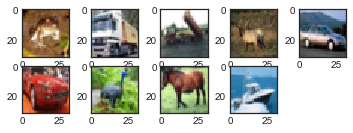

In [11]:
from scipy.misc import toimage
for i in range(0, 9):
    plt.subplot(450 + 1 + i)
    plt.imshow(toimage(X_train[i]))
plt.show()

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
import keras
from keras import backend as K

### Converting y_train and y_test into one hot encoder , eg.  3--> [0,0,0,1,0,0,0,0,0,0]

In [14]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)  #  10 is used because we have to classify images in 10 groups

In [15]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Making the model with convolutional layers , maxpool layers and dropout layers to enhance regularization and generalization with further avoidance to overfitting .

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(32 , 32 , 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))      #  10 is used because we have to classify images in 10 groups

In [17]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [18]:
model.compile(optimizer = RMSprop(lr=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.0, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [20]:
batch_size = 64
epochs = 7
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [21]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[lr_reduce],
                    validation_data=(X_test, y_test),
                    epochs = epochs, verbose = 2)

Epoch 1/7
 - 562s - loss: 1.5031 - acc: 0.4561 - val_loss: 1.9042 - val_acc: 0.4227
Epoch 2/7
 - 512s - loss: 1.1567 - acc: 0.5892 - val_loss: 1.0867 - val_acc: 0.6287
Epoch 3/7
 - 513s - loss: 1.0288 - acc: 0.6351 - val_loss: 1.2717 - val_acc: 0.5889

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/7
 - 509s - loss: 0.8868 - acc: 0.6893 - val_loss: 0.8078 - val_acc: 0.7258
Epoch 5/7
 - 522s - loss: 0.8512 - acc: 0.7040 - val_loss: 0.8064 - val_acc: 0.7242

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 6/7
 - 498s - loss: 0.8318 - acc: 0.7101 - val_loss: 0.7801 - val_acc: 0.7338
Epoch 7/7
 - 497s - loss: 0.8293 - acc: 0.7127 - val_loss: 0.7886 - val_acc: 0.7303

Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('valid loss:', score[0])
print('valid accuracy:', score[1])

valid loss: 0.788641656589508
valid accuracy: 0.7303


In [23]:
pred = model.predict(X_test)

In [24]:
pred.shape

(10000, 10)

In [25]:
pred

array([[1.0895532e-03, 1.5726088e-03, 1.1879116e-03, ..., 6.5433915e-04,
        3.9522112e-03, 6.7664869e-03],
       [1.6899221e-03, 3.7324283e-01, 3.2468970e-06, ..., 2.5579212e-07,
        6.2450874e-01, 5.5261719e-04],
       [1.3267065e-02, 7.1619546e-01, 6.3534867e-04, ..., 1.3456700e-04,
        2.2051232e-01, 4.7972668e-02],
       ...,
       [1.2516623e-04, 1.2592261e-05, 1.6311783e-02, ..., 3.3117488e-02,
        2.0777105e-04, 8.8431458e-05],
       [1.2535433e-01, 8.2895684e-01, 2.5914526e-03, ..., 1.0680439e-02,
        1.4042178e-03, 5.2191927e-03],
       [8.0827733e-05, 5.2632712e-04, 5.9639884e-04, ..., 8.3771557e-01,
        2.1880778e-04, 1.7133218e-05]], dtype=float32)

In [26]:
pred_digits = np.argmax(pred , axis = 1)
ImageId = range( 1 , len(pred_digits)+1 )

In [27]:
pred_digits

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [28]:
len(ImageId)

10000

In [29]:
context = {"ImageId" : ImageId , "Label" : pred_digits }
ans = pd.DataFrame(context)

### ans is the predicted dataframe by CNN

In [30]:
ans.head()

,ImageId,Label
0,1,3
1,2,8
2,3,1
3,4,0
4,5,6


### Converting the dataframe to csv file

In [31]:
ans.to_csv("E:/MLproject/PredictionsbyCNN1.csv", index=None)